# The Situation at Hand
> This is a project walthrough for an operation analysis worklog for Adventure Works Cycles, a fictitious bicycle manufacturer. 

* With certain departments facing a high turnover rate, a struggle to attract and retain top talent, low work performance and output, and a constant hum of employee complaints and strikes, it’s clear that the ride has been anything but smooth for Adventure Works Cycles, a fictitious bicycle manufacturer. 

* In the face of these challenges, the HR manager has posed a critical question for the operations analysis data team: ‘How does our organization fare in terms of Market Competitiveness and Pay Equity?’ It’s a question that holds the key to understanding the current predicament and, more importantly, charting the course for a smoother journey ahead.

* This blog post is your behind-the-scenes pass to the rigorous analysis process undertaken by our data analyst in response to this question. From the initial data collection to the final insights, we’ll walk you through each step of the journey, shedding light on the intricate workings of HR operations analysis.

# Data Preparation

In [1]:
pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=dc38bacb264a3fc2c80e117955af1f239413af0beffc7f452d70bcbc7181e36b
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyforest

In [3]:
# loading and reading dataset
df = pd.read_excel("/kaggle/input/hr-dataset1/HR analysis.xlsx")
print(df.head)

<IPython.core.display.Javascript object>

<bound method NDFrame.head of      BusinessEntityID                   Full Name  \
0                   1               Ken.J.Sánchez   
1                   2             Terri.Lee.Duffy   
2                   3         Roberto..Tamburello   
3                   4                Rob..Walters   
4                   5             Gail.A.Erickson   
..                ...                         ...   
285               286             Lynn.N.Tsoflias   
286               287               Amy.E.Alberts   
287               288             Rachel.B.Valdez   
288               289                   Jae.B.Pak   
289               290  Ranjit.R.Varkey Chudukatil   

                          JobTitle   Department  \
0          Chief Executive Officer    Executive   
1    Vice President of Engineering  Engineering   
2              Engineering Manager  Engineering   
3             Senior Tool Designer  Engineering   
4                  Design Engineer  Engineering   
..                         

In [4]:
# reading top 5 records
df.head()

,BusinessEntityID,Full Name,JobTitle,Department,Department_Category,DOB,Age,HireYear,Company LOS,Gender,Marital Status,Shift_ID,Shift Name,Hourly Pay Rate,PayFrequency
0,1,Ken.J.Sánchez,Chief Executive Officer,Executive,Executive General and Administration,1969,55,2009,15,Male,Single,1,Day,125.5000,Biweekly
1,2,Terri.Lee.Duffy,Vice President of Engineering,Engineering,Research and Development,1971,53,2008,16,Female,Single,1,Day,63.4615,Biweekly
2,3,Roberto..Tamburello,Engineering Manager,Engineering,Research and Development,1974,50,2007,17,Male,Married,1,Day,43.2692,Biweekly
3,4,Rob..Walters,Senior Tool Designer,Engineering,Research and Development,1974,50,2007,17,Male,Single,1,Day,8.6200,Biweekly
4,5,Gail.A.Erickson,Design Engineer,Engineering,Research and Development,1952,72,2008,16,Female,Married,1,Day,32.6923,Biweekly


In [5]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BusinessEntityID     290 non-null    int64  
 1   Full Name            290 non-null    object 
 2   JobTitle             290 non-null    object 
 3   Department           290 non-null    object 
 4   Department_Category  290 non-null    object 
 5   DOB                  290 non-null    int64  
 6   Age                  290 non-null    int64  
 7   HireYear             290 non-null    int64  
 8   Company LOS          290 non-null    int64  
 9   Gender               290 non-null    object 
 10  Marital Status       290 non-null    object 
 11  Shift_ID             290 non-null    int64  
 12  Shift Name           290 non-null    object 
 13  Hourly Pay Rate      290 non-null    float64
 14  PayFrequency         290 non-null    object 
dtypes: float64(1), int64(6), object(8)
memor

In [6]:
# Checking for null values
df.isnull().sum()

BusinessEntityID       0
Full Name              0
JobTitle               0
Department             0
Department_Category    0
DOB                    0
Age                    0
HireYear               0
Company LOS            0
Gender                 0
Marital Status         0
Shift_ID               0
Shift Name             0
Hourly Pay Rate        0
PayFrequency           0
dtype: int64

In [7]:
# summary statistic
df.describe()

,BusinessEntityID,DOB,Age,HireYear,Company LOS,Shift_ID,Hourly Pay Rate
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,1978.017241,45.982759,2009.017241,14.982759,1.572414,17.819179
std,83.860002,9.246886,9.246886,1.006748,1.006748,0.778116,12.114226
min,1.000000,1951.000000,33.000000,2006.000000,11.000000,1.000000,6.500000
25%,73.250000,1973.000000,38.000000,2008.000000,15.000000,1.000000,11.000000
50%,145.500000,1978.500000,45.500000,2009.000000,15.000000,1.000000,14.000000
75%,217.750000,1986.000000,51.000000,2009.000000,16.000000,2.000000,23.076900
max,290.000000,1991.000000,73.000000,2013.000000,18.000000,3.000000,125.500000


In [8]:
#checking distinct values

df.nunique()

BusinessEntityID       290
Full Name              290
JobTitle                67
Department              16
Department_Category      6
DOB                     38
Age                     38
HireYear                 8
Company LOS              8
Gender                   2
Marital Status           2
Shift_ID                 3
Shift Name               3
Hourly Pay Rate         55
PayFrequency             2
dtype: int64

In [9]:
# Checking for duplicated values

df.duplicated().sum()

0

# **Analysis**

## Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

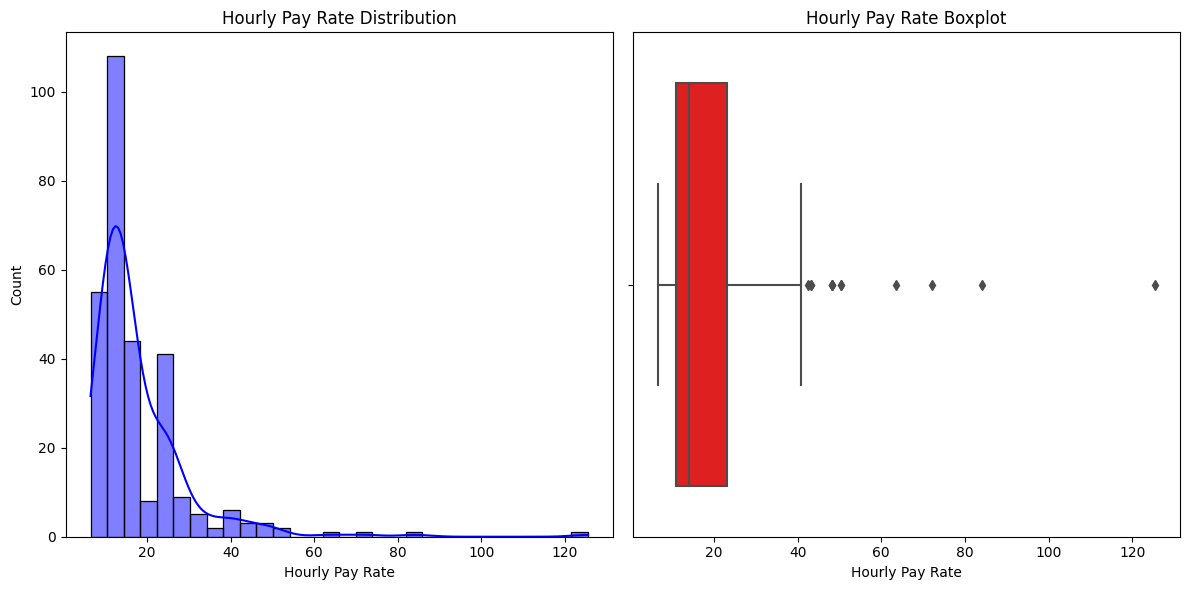

In [10]:
# Hourly pay rate Distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=100)

# Histogram
sns.histplot(data=df, x='Hourly Pay Rate', kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Hourly Pay Rate Distribution')

# Boxplot
sns.boxplot(data=df, x='Hourly Pay Rate', color='red', ax=axes[1])
axes[1].set_title('Hourly Pay Rate Boxplot')

# Display the plots
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

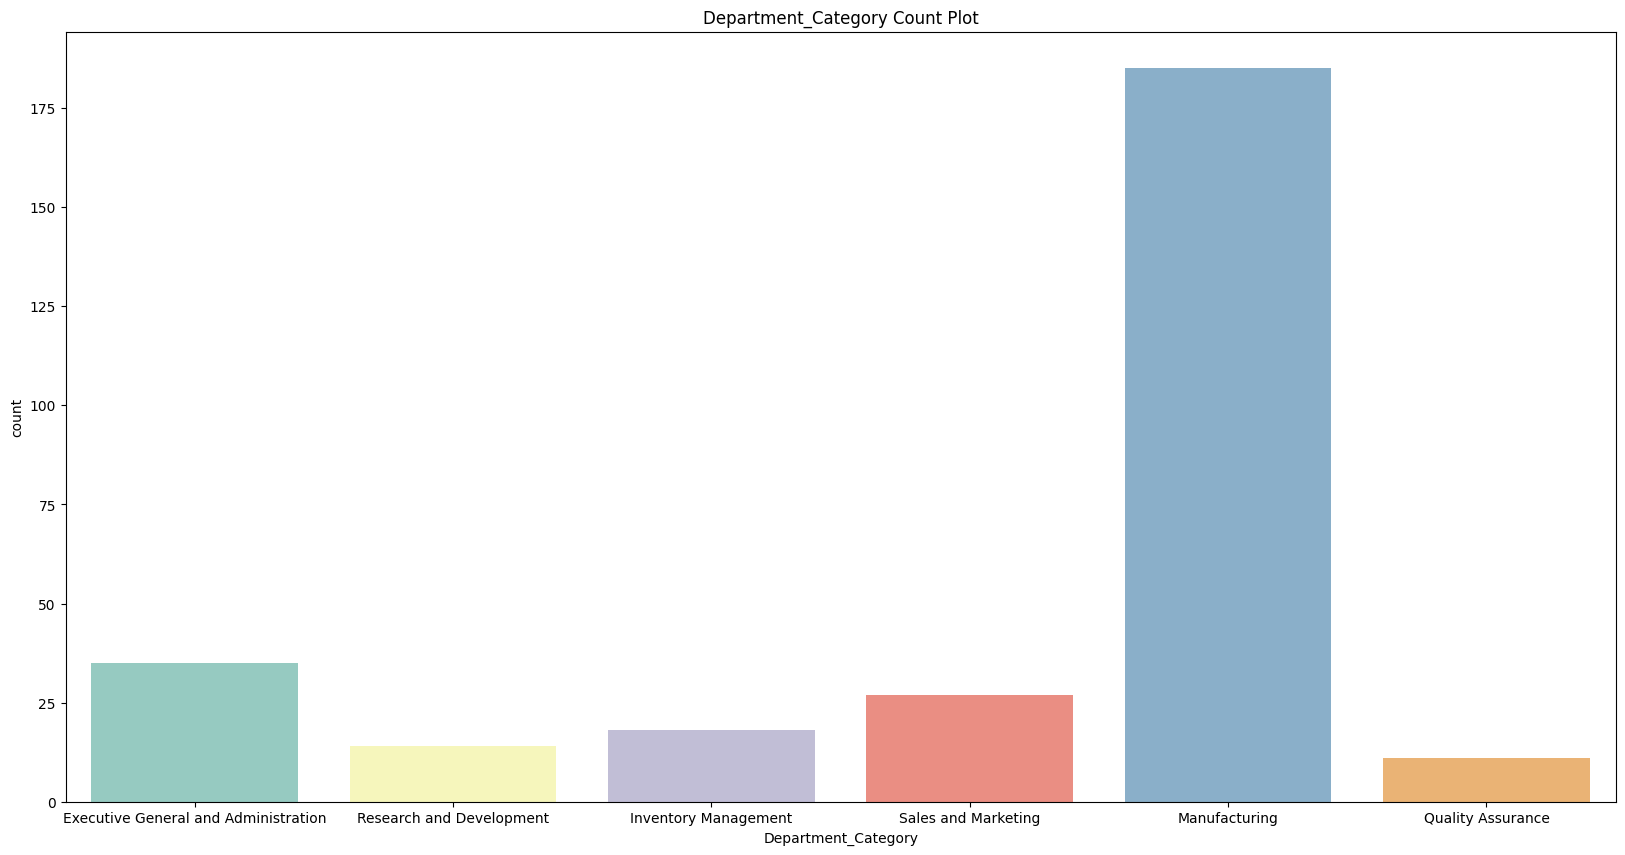

In [11]:
# Department_Category Count plot

plt.figure(figsize = (20, 10), dpi = 100)
sns.countplot(data = df, x = 'Department_Category', palette = 'Set3')
plt.title("Department_Category Count Plot")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

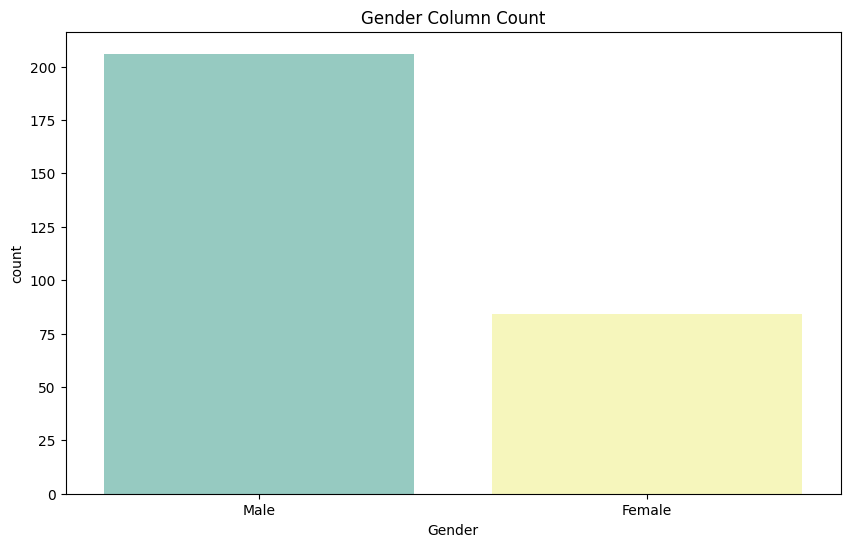

In [12]:
# Gender Count plot

plt.figure(figsize = (10, 6), dpi = 100)
sns.countplot(data = df, x = 'Gender', palette = 'Set3')
plt.title("Gender Column Count")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

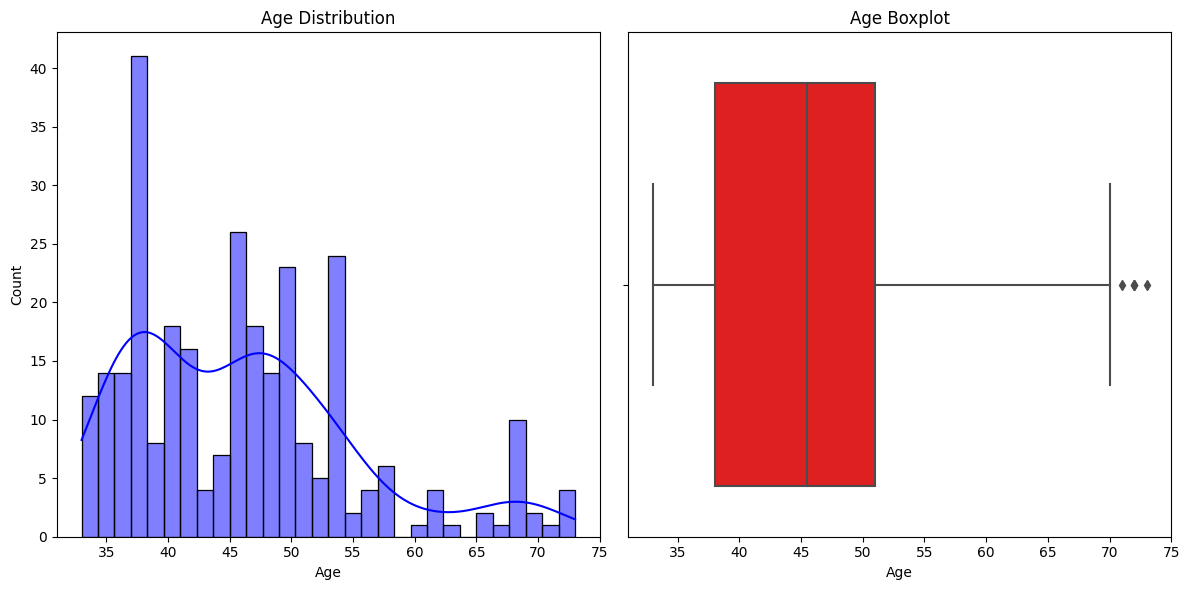

In [13]:
# Age Distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=100)

# Histogram
sns.histplot(data=df, x='Age', kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Age Distribution')

# Boxplot
sns.boxplot(data=df, x='Age', color='red', ax=axes[1])
axes[1].set_title('Age Boxplot')

# Display the plots
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

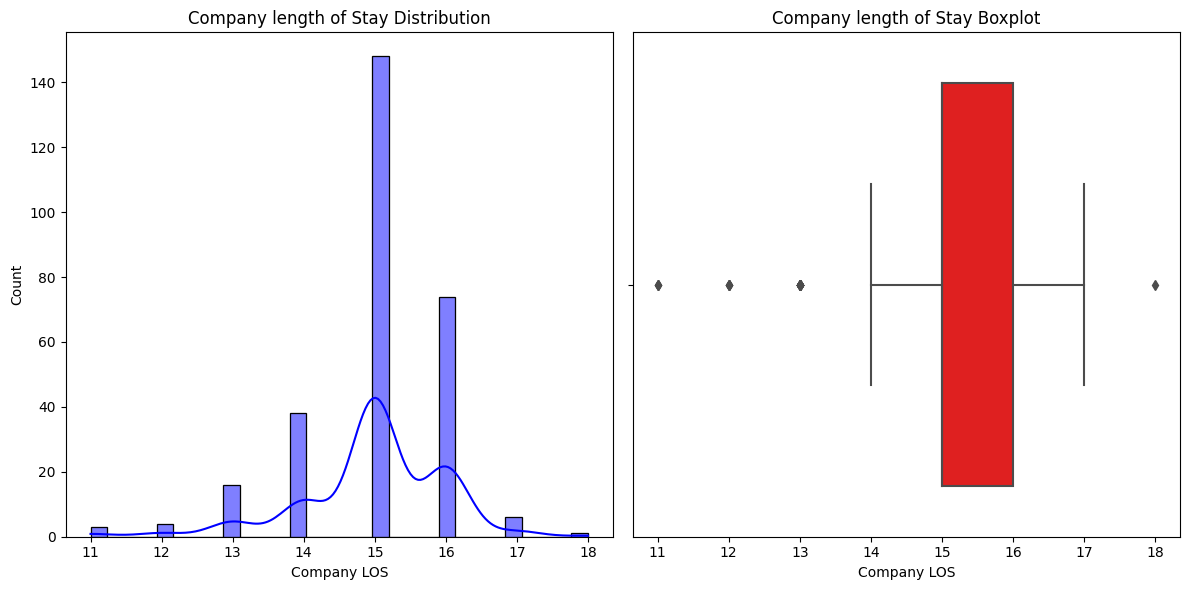

In [14]:
# Company length of Stay Distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=100)

# Histogram
sns.histplot(data=df, x='Company LOS', kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Company length of Stay Distribution')

# Boxplot
sns.boxplot(data=df, x='Company LOS', color='red', ax=axes[1])
axes[1].set_title('Company length of Stay Boxplot')

# Display the plots
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

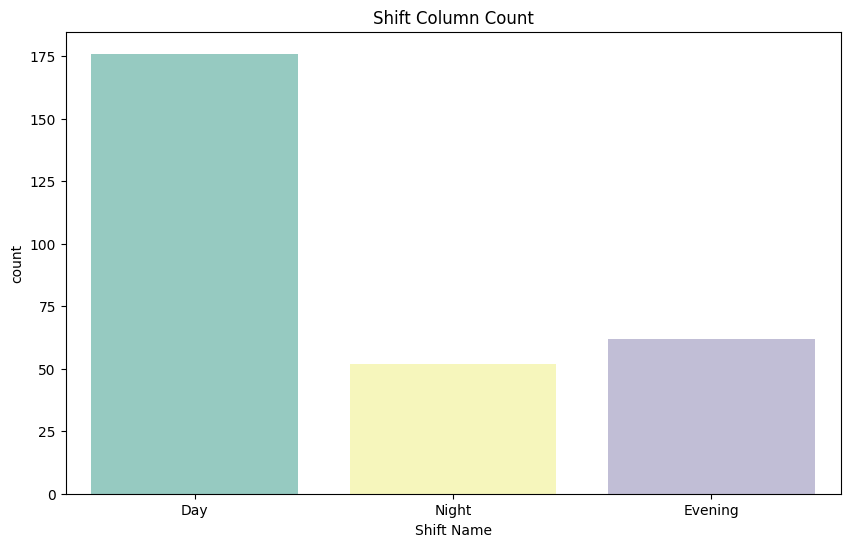

In [15]:
# Shift Count Plot

plt.figure(figsize = (10, 6), dpi = 100)
sns.countplot(data = df, x = 'Shift Name', palette = 'Set3')
plt.title("Shift Column Count")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

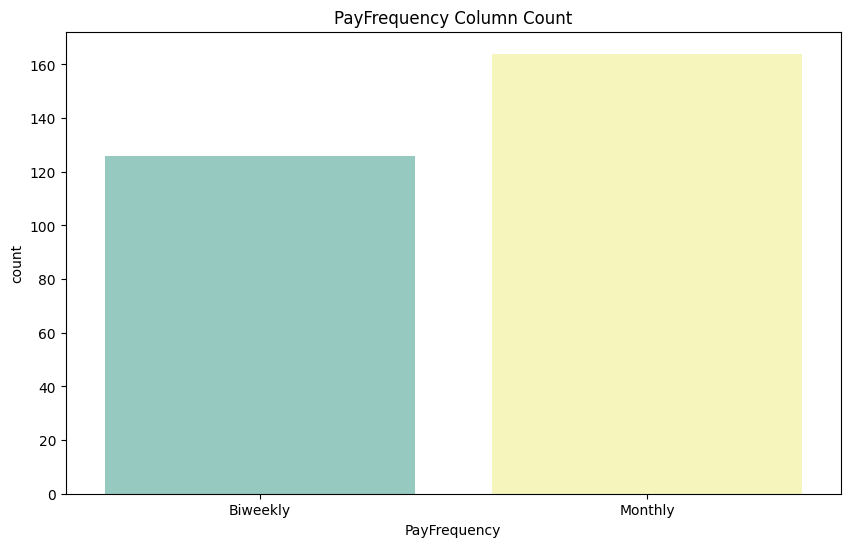

In [16]:
# Pay Frequency Countplot

plt.figure(figsize = (10, 6), dpi = 100)
sns.countplot(data = df, x = 'PayFrequency', palette = 'Set3')
plt.title("PayFrequency Column Count")
plt.show()

# ANSWERING THE BUSINESS QUESTIONS

## Are There Any Pay Disparities Between Different Groups (Gender, Department & Shift)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

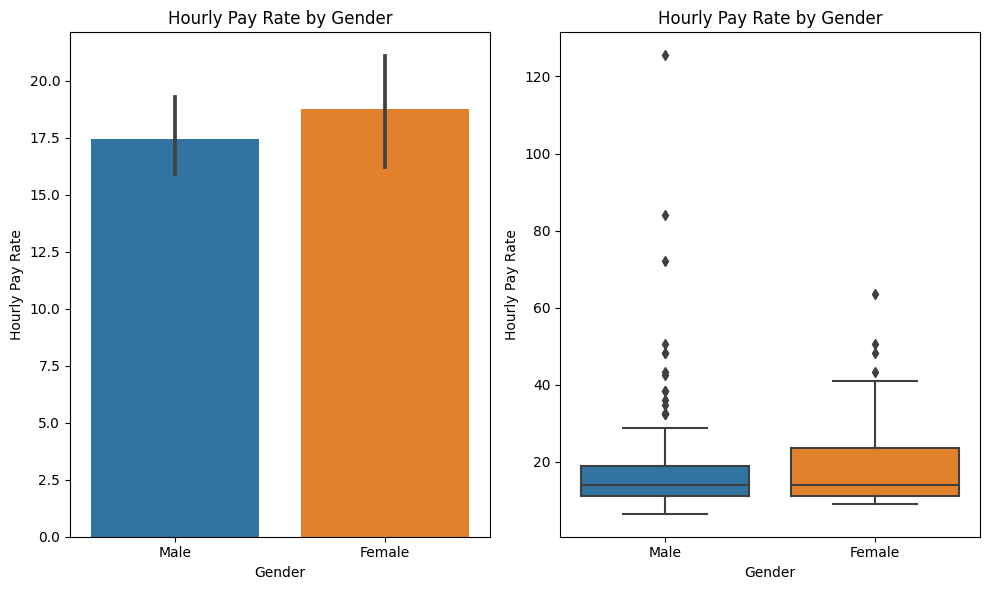

In [17]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), dpi=100)

# Barplot
sns.barplot(x='Gender', y='Hourly Pay Rate', data=df, ax=axes[0])
axes[0].set_title('Hourly Pay Rate by Gender')

# Boxplot
sns.boxplot(x='Gender', y='Hourly Pay Rate', data=df, ax=axes[1])
axes[1].set_title('Hourly Pay Rate by Gender')

# Display the plots
plt.tight_layout()
plt.show()


> ***Females have a slight higher hourly compensation rate compared to males***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

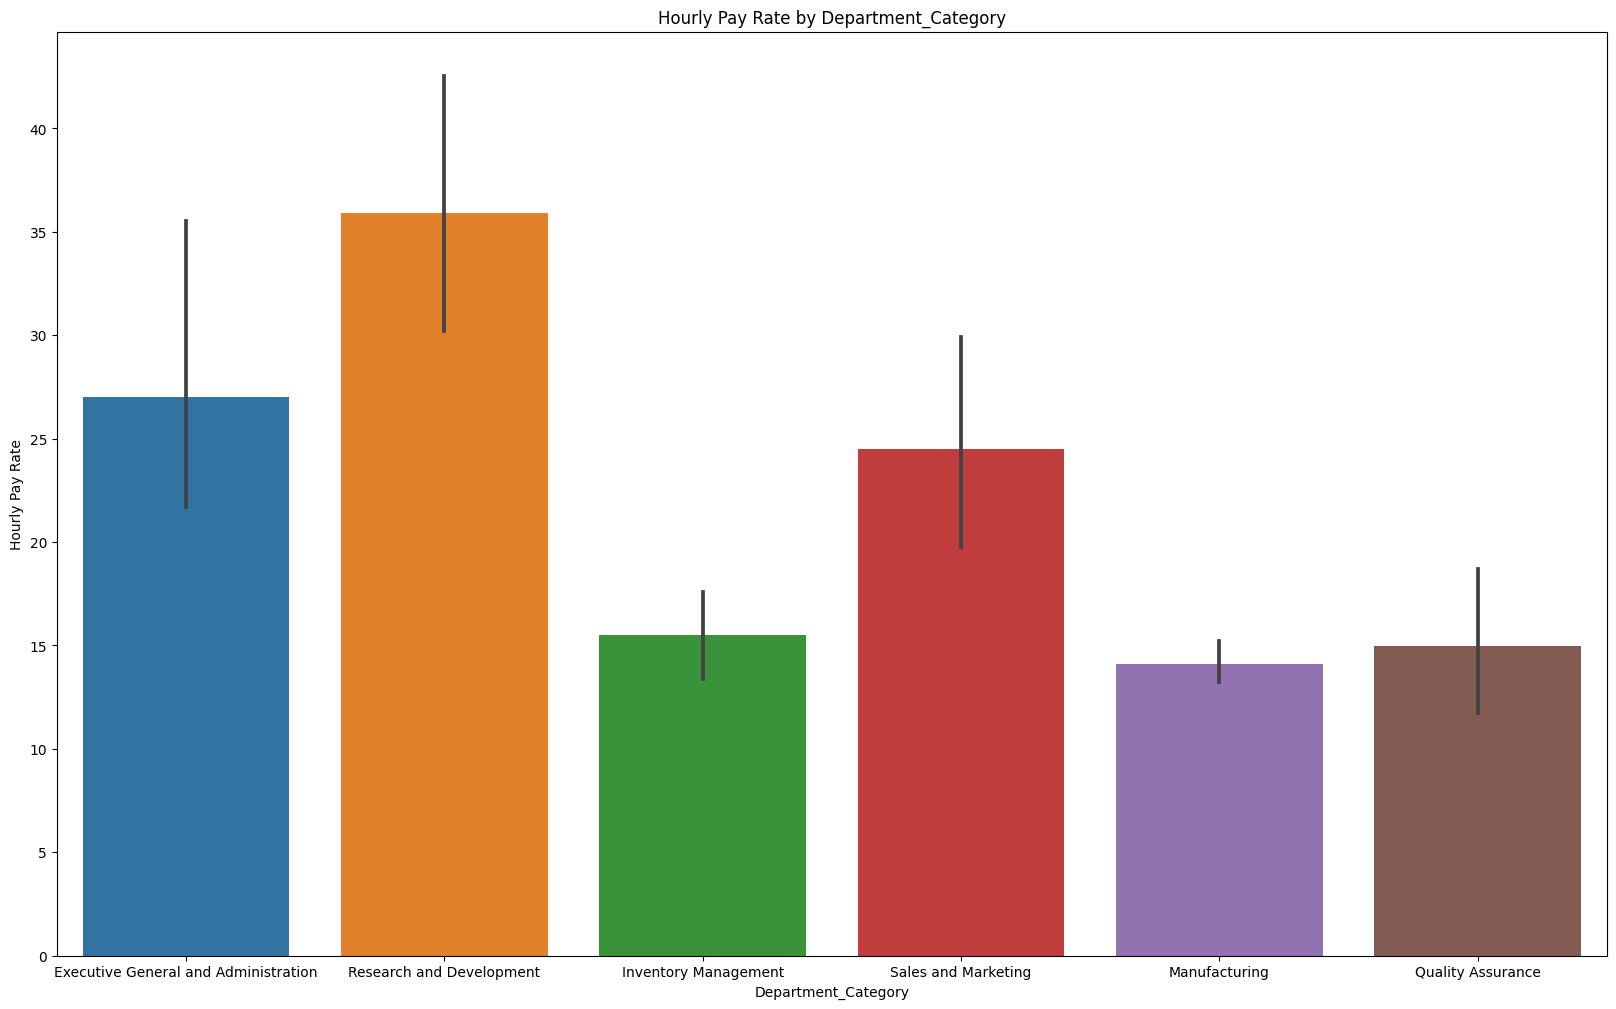

In [18]:
# Create a figure and a grid of subplots
plt.figure(figsize= (20, 12), dpi=100)

# Barplot
sns.barplot(x='Department_Category', y='Hourly Pay Rate', data=df)
plt.title('Hourly Pay Rate by Department_Category')

# Display the plots
plt.show()


>  ***Research and development, Executive General and Administartion, Sales and Marketing lead with a higher hourly compensation rate as compared to the other department category***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

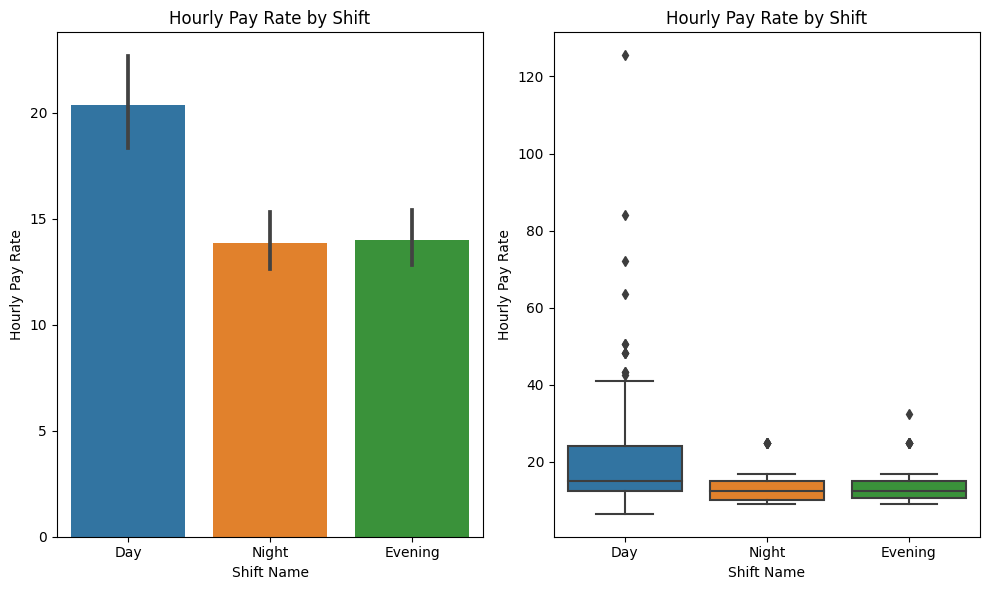

In [19]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), dpi=100)

# Barplot
sns.barplot(x='Shift Name', y='Hourly Pay Rate', data=df, ax=axes[0])
axes[0].set_title('Hourly Pay Rate by Shift')

# Boxplot
sns.boxplot(x='Shift Name', y='Hourly Pay Rate', data=df, ax=axes[1])
axes[1].set_title('Hourly Pay Rate by Shift')

# Display the plots
plt.tight_layout()
plt.show()


> ***Employees working in day shift receieve a slight higher compensation rate compared to the other shifts***

## Insights

## How Competitive is our Hourly Compensation with the Market Average rate

* The average market hourly compensation rate is **26.5**
* Adventures Works average hourly compensation rate is **17.8**
* There is a difference of **8.7** with the market average hourly compenstation

> We are underpaying our employees

## This then explains why

* Certain departments have a high turnover rate 
* There is a struggle to attract and retain top talent
* There is low work perfomance and output
* Constant complains and strikes from employees

## Way Forwad

* The analysis reveals significant pay disparities between different groups (e.g., gender,department & shift), the organization might need to review its compensation policies to ensure fairness and compliance with equal pay laws.
* The analysis reveals the organization’s compensation is significantly lower than the market average. In this case, the organization might consider increasing its compensation levels or offering other benefits to remain competitive.
* The analysis reveals that certain departments have a high turnover rate and these departments also have lower average salaries. The organization could consider increasing salaries in these departments or looking into other factors that might be contributing to the high turnover.